In [42]:
import cdflib
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from pathlib import Path
os.chdir(r'D:/ISRO Hackthon')

Reading: AL1_ASW91_L2_BLK_20240801_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240802_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240803_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240804_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240805_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240806_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240807_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240808_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240809_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240810_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240811_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240812_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240813_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240814_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240815_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240816_UNP_9999_999999_V01.cdf
Reading: AL1_ASW91_L2_BLK_20240817_UNP_9999_999999_V01.c

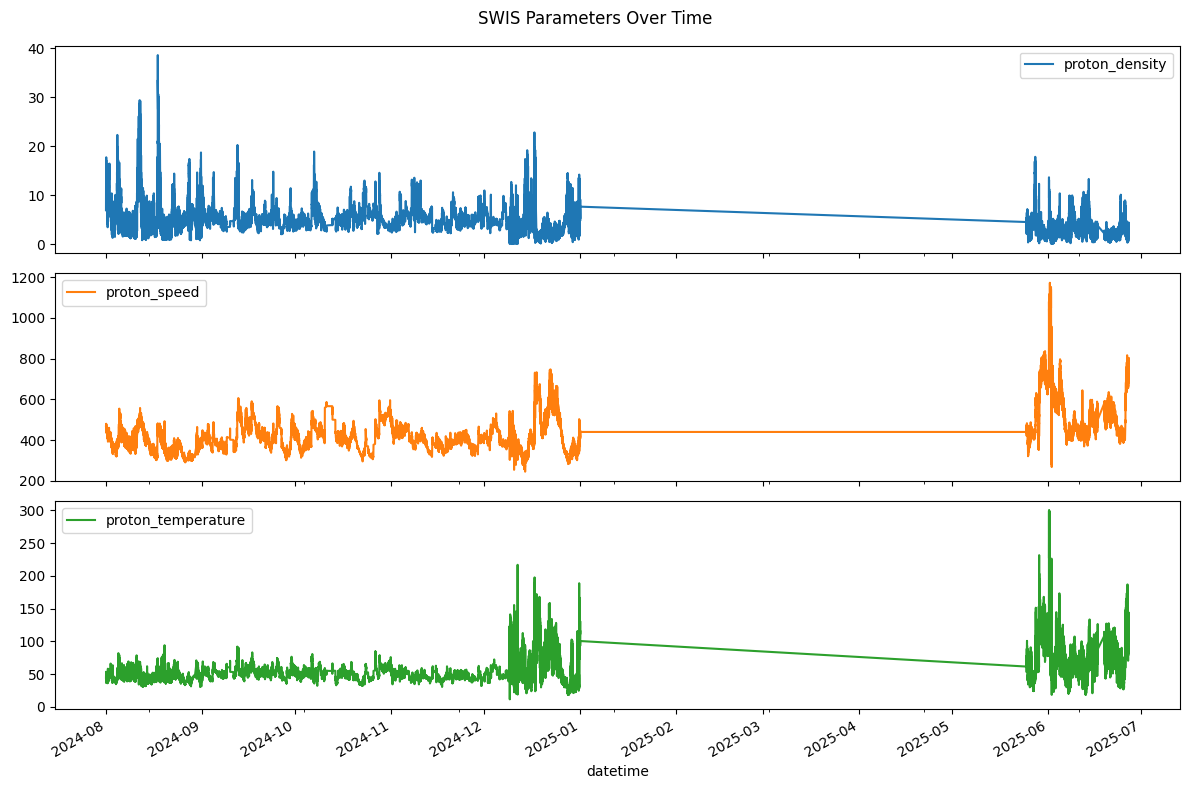

In [46]:
data_folder = Path("HaloCMEs/Data")
all_data = []

for file_path in sorted(data_folder.glob("*.cdf")):  # Iterates through all the files with CDF extension
    print(f"Reading: {file_path.name}")
    try:
        cdf_file = cdflib.CDF(str(file_path))

        # Try both possible timestamp variable names
        try:
            timestamps = cdf_file.varget('epoch_for_cdf_mod')  # newer files
        except:
            timestamps = cdf_file.varget('epoch_for_cdf')  # older files

        datetime_vals = cdflib.cdfepoch.to_datetime(timestamps)  # converting the epoch to our normal understanding of time
        datetime_python = pd.to_datetime(datetime_vals)  # the datetime is in numpy64 format which is something I have trouble understanding so I am converting it

        proton_density = cdf_file.varget('proton_density')

        # Try both possible speed field names
        try:
            proton_speed = cdf_file.varget('proton_bulk_speed')  # newer files
        except:
            proton_speed = cdf_file.varget('proton_bulk')  # older files

        proton_temp = cdf_file.varget('proton_thermal')

        # Creating a Data Frame
        df_day = pd.DataFrame({
            'datetime': datetime_python,
            'proton_density': proton_density,
            'proton_speed': proton_speed,
            'proton_temperature': proton_temp
        })

        # Drop rows with invalid values (optional)
        df_day.replace(-1.0e+31, pd.NA, inplace=True)  # CDF missing values sometimes use extreme values
        df_day.dropna(inplace=True)  # Removes the rows which contain missing values

        all_data.append(df_day)

    except Exception as e:
        print(f"Error Reading {file_path.name}: {e}")

df = pd.concat(all_data).sort_values('datetime')
df.set_index('datetime', inplace=True)

# Plotting
df.plot(subplots=True, figsize=(12, 8), title="SWIS Parameters Over Time")
plt.tight_layout()
plt.legend()
plt.show()


In [50]:
# Extract the date part only (no time) from the index
available_dates = pd.to_datetime(df.index.date).unique()
available_dates = pd.Series(available_dates)

# Create a complete date range from min to max date
full_date_range = pd.date_range(start=available_dates.min(), end=available_dates.max(), freq='D')

# Find missing dates
missing_dates = full_date_range.difference(available_dates)

# Output the results
if not missing_dates.empty:
    print(f"Missing dates ({len(missing_dates)} total):")
    for date in missing_dates:
        print(date.date())
else:
    print("No missing dates.")


Missing dates (148 total):
2024-09-09
2024-10-12
2025-01-01
2025-01-02
2025-01-03
2025-01-04
2025-01-05
2025-01-06
2025-01-07
2025-01-08
2025-01-09
2025-01-10
2025-01-11
2025-01-12
2025-01-13
2025-01-14
2025-01-15
2025-01-16
2025-01-17
2025-01-18
2025-01-19
2025-01-20
2025-01-21
2025-01-22
2025-01-23
2025-01-24
2025-01-25
2025-01-26
2025-01-27
2025-01-28
2025-01-29
2025-01-30
2025-01-31
2025-02-01
2025-02-02
2025-02-03
2025-02-04
2025-02-05
2025-02-06
2025-02-07
2025-02-08
2025-02-09
2025-02-10
2025-02-11
2025-02-12
2025-02-13
2025-02-14
2025-02-15
2025-02-16
2025-02-17
2025-02-18
2025-02-19
2025-02-20
2025-02-21
2025-02-22
2025-02-23
2025-02-24
2025-02-25
2025-02-26
2025-02-27
2025-02-28
2025-03-01
2025-03-02
2025-03-03
2025-03-04
2025-03-05
2025-03-06
2025-03-07
2025-03-08
2025-03-09
2025-03-10
2025-03-11
2025-03-12
2025-03-13
2025-03-14
2025-03-15
2025-03-16
2025-03-17
2025-03-18
2025-03-19
2025-03-20
2025-03-21
2025-03-22
2025-03-23
2025-03-24
2025-03-25
2025-03-26
2025-03-27
2025-

In [49]:
# Check first few CDF files to list available variables
for file_path in sorted(Path("HaloCMEs/Data").glob("*.cdf")):
    print(f"\n📁 File: {file_path.name}")
    try:
        cdf = cdflib.CDF(str(file_path))
        variables = cdf.cdf_info().zVariables
        print("🔍 Available Variables:")
        for v in variables:
            print("   -", v)
    except Exception as e:
        print(f"❌ Error reading {file_path.name}: {e}")



📁 File: AL1_ASW91_L2_BLK_20240801_UNP_9999_999999_V01.cdf
🔍 Available Variables:
   - epoch_for_cdf
   - proton_density
   - numden_p_uncer
   - proton_bulk
   - bulk_p_uncer
   - proton_thermal
   - thermal_p_uncer
   - spacecraft_xpos
   - spacecraft_ypos
   - spacecraft_zpos

📁 File: AL1_ASW91_L2_BLK_20240802_UNP_9999_999999_V01.cdf
🔍 Available Variables:
   - epoch_for_cdf
   - proton_density
   - numden_p_uncer
   - proton_bulk
   - bulk_p_uncer
   - proton_thermal
   - thermal_p_uncer
   - spacecraft_xpos
   - spacecraft_ypos
   - spacecraft_zpos

📁 File: AL1_ASW91_L2_BLK_20240803_UNP_9999_999999_V01.cdf
🔍 Available Variables:
   - epoch_for_cdf
   - proton_density
   - numden_p_uncer
   - proton_bulk
   - bulk_p_uncer
   - proton_thermal
   - thermal_p_uncer
   - spacecraft_xpos
   - spacecraft_ypos
   - spacecraft_zpos

📁 File: AL1_ASW91_L2_BLK_20240804_UNP_9999_999999_V01.cdf
🔍 Available Variables:
   - epoch_for_cdf
   - proton_density
   - numden_p_uncer
   - proton_bulk
  

In [48]:
data_folder = Path("HaloCMEs/SOHOData")
halo_cme_times = []

for file_path in sorted(data_folder.glob("*.txt")):
    with open(file_path, "r") as file:
        for line in file:
            if "Halo" in line and "360" in line:
                try:
                    date_str = line[0:10].strip()
                    time_str = line[11:19].strip()
                    dt = datetime.strptime(f"{date_str} {time_str}", "%Y/%m/%d %H:%M:%S")
                    halo_cme_times.append(dt)
                except Exception as e:
                    print(f"Error parsing line in {file_path.name}:{line.strip()}")
                    print(f"    {e}")

print("Total Halo CME Events found: ", len(halo_cme_times))
print("First 5 events: ")
for dt in halo_cme_times[:5]:
    print(" ->", dt)

Total Halo CME Events found:  113
First 5 events: 
 -> 2024-01-02 11:12:00
 -> 2024-01-04 00:00:00
 -> 2024-01-20 06:24:00
 -> 2024-01-20 09:12:00
 -> 2024-01-21 00:24:00


In [ ]:
# Number of events to visualize (you can change this)
num_events_to_plot = 113

# Make sure df is your SWIS dataframe with datetime index
for i, cme_time in enumerate(halo_cme_times[:num_events_to_plot]):
    start_time = cme_time - timedelta(hours=6)
    end_time = cme_time + timedelta(hours=6)
    
    window_df = df.loc[(df.index >= start_time) & (df.index <= end_time)]

    if window_df.empty:
        print(f"⚠️ No SWIS data for CME at {cme_time}")
        continue

    print(f"🛰️ CME {i+1} → {cme_time} | Records found: {len(window_df)}")

    window_df.plot(
        subplots=True,
        figsize=(12, 8),
        title=f'SWIS Parameters around CME on {cme_time.strftime("%Y-%m-%d %H:%M")}',
        sharex=True
    )
    
    plt.tight_layout()
    plt.show()


In [ ]:
for i, cme_time in enumerate(halo_cme_times[:100]):
    start_time = cme_time - timedelta(hours=6)
    end_time = cme_time + timedelta(hours=6)

    # Relaxed filtering: Find any data within the window
    window_df = df[(df.index >= start_time) & (df.index <= end_time)]

    if len(window_df) == 0:
        continue  # No data for this event

    print(f"🛰️ CME {i+1}: {cme_time} | SWIS records: {len(window_df)}")

    window_df.plot(
        subplots=True,
        figsize=(12, 8),
        title=f'SWIS Parameters around CME on {cme_time.strftime("%Y-%m-%d %H:%M")}',
        sharex=True
    )
    
    plt.tight_layout()
    plt.show()

    if i >= 4:  # Stop after 5 successful plots
        break

In [ ]:
matching_cmes = []

for cme_time in halo_cme_times:
    # ±6 hour window
    start = cme_time - timedelta(hours=6)
    end = cme_time + timedelta(hours=6)

    # Check if any SWIS timestamp falls in this range
    if not df.loc[(df.index >= start) & (df.index <= end)].empty:
        matching_cmes.append(cme_time)

# Results
print(f"✅ CME timestamps that overlap with SWIS data: {len(matching_cmes)}")
for dt in matching_cmes[:5]:
    print("  →", dt)

In [ ]:

# Plot all matching CME windows
for i, cme_time in enumerate(matching_cmes):
    start_time = cme_time - timedelta(hours=6)
    end_time = cme_time + timedelta(hours=6)

    window_df = df[(df.index >= start_time) & (df.index <= end_time)]

    if window_df.empty:
        print(f"⚠️ No data found for CME {i+1} at {cme_time}")
        continue

    print(f"🛰️ CME {i+1}: {cme_time} | SWIS points: {len(window_df)}")

    window_df.plot(
        subplots=True,
        figsize=(12, 8),
        title=f'SWIS Parameters Around CME {i+1} on {cme_time.strftime("%Y-%m-%d %H:%M")}',
        sharex=True
    )
    plt.tight_layout()
    plt.show()


In [ ]:
def detect_cme_candidates(df, speed_thresh=600, temp_spike=20, dens_spike=2, window=12):
    df = df.copy()

    # Rolling means for smoothing
    df['speed_mean'] = df['proton_speed'].rolling(window=window, center=True).mean()
    df['density_mean'] = df['proton_density'].rolling(window=window, center=True).mean()
    df['temp_mean'] = df['proton_temperature'].rolling(window=window, center=True).mean()

    # Spikes
    df['speed_spike'] = df['proton_speed'] > speed_thresh
    df['temp_spike'] = (df['proton_temperature'] - df['temp_mean']) > temp_spike
    df['dens_spike'] = (df['proton_density'] - df['density_mean']) > dens_spike

    # CME-like if at least 2 out of 3 spike flags are True
    df['cme_like'] = df[['speed_spike', 'temp_spike', 'dens_spike']].sum(axis=1) >= 2

    return df


In [ ]:
df_cme = detect_cme_candidates(df)


In [ ]:
# Get timestamps where CME-like signature was detected
detected_cmes = df_cme[df_cme['cme_like']].index

print(f"📍 Potential CME candidates found: {len(detected_cmes)}")
print("🕒 Sample detected times:")
for t in detected_cmes[:5]:
    print("  →", t)

In [ ]:
from datetime import timedelta

for i, t in enumerate(detected_cmes[:3]):
    window = df_cme[(df_cme.index >= t - timedelta(hours=6)) & (df_cme.index <= t + timedelta(hours=6))]

    window[['proton_density', 'proton_speed', 'proton_temperature']].plot(
        subplots=True, figsize=(12, 8),
        title=f'Auto-Detected CME-like Event #{i+1} at {t.strftime("%Y-%m-%d %H:%M")}'
    )
    plt.tight_layout()
    plt.show()